In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import weibull
sys.path.append('../../..')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [41]:
%matplotlib notebook

In [42]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

In [43]:
# Loading in the compressed data
Flattenedfilename = 'Segments_compr_flat_filt.npz'; print(Flattenedfilename)
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments_compr_flat_filt.npz
Segments_compr_flat_filt_roughness.jpg
12
2018-07-05/Case1.0 (calibration)


In [44]:
# Histogram accumulation
countslist = []
accumlist = [7,8,9,10,11,12,13,14] # all
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
Z2minforhist = 0
Z2maxforhist = .025
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
nbins_max = 10
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2bins[1],Z2bins[-1]) # This is for Weibull plots
levels = 3; print('Using levels =', levels, 'for uncertainty analysis')


Accumulating segments [7, 8, 9, 10, 11, 12, 13, 14]
Plotting segments [7, 8, 9, 10, 11, 12, 13, 14]
Z2 ranging from 0 to 0.025
Max number of bins specified is 10
Sturges rule says maxbins = 10
Using nbins =  10
Using levels = 3 for uncertainty analysis


Original =  899
4 0 225 [2 1 5 1 3 4 1 4 1]
4 1 225 [3 4 1 2 4 1 1 4 1]
4 2 225 [4 4 0 2 2 1 0 1 3]
4 3 224 [3 0 0 0 3 1 2 2 1]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.2998691445570172
statsigma =  0.5476030903464819
Original =  1260
4 0 315 [44 25 32 36 18 19 19 14 14]
4 1 315 [38 30 35 28 22 21 20 14 18]
4 2 315 [44 32 25 22 23 30 24 18 13]
4 3 315 [45 35 21 25 32 19 21 18 12]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.02146769826048174
statsigma =  0.14651859356573738
Original =  1260
4 0 315 [33 36 23 29 23 22 19 11 11]
4 1 315 [33 37 24 38 16 14 20 16 11]
4 2 315 [31 44 31 23 17 17 17 19 10]
4 3 315 [29 37 33 32 28 21  9  6 14]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.0285752739914912
statsigma =  0.1690422254689378
Original =  875
4 0 219 [0 2 0 1 1 0 0 1 0]
4 1 219 [0 2 0 0 1 2 1 0 0]
4 2 219 [1 0 0 0 0 2 1 1 0]
4 3 218 [1 2 0 0 0 0 1 1 1]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.4043388620463455
statsigma =  0.6

<IPython.core.display.Javascript object>


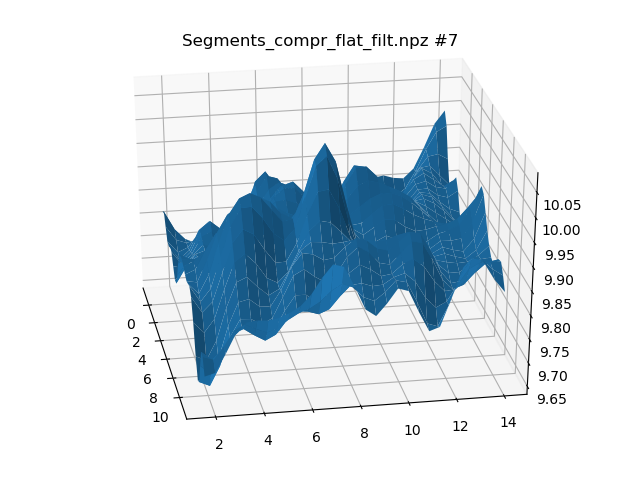

integral =  0.0022023809523809526


<IPython.core.display.Javascript object>


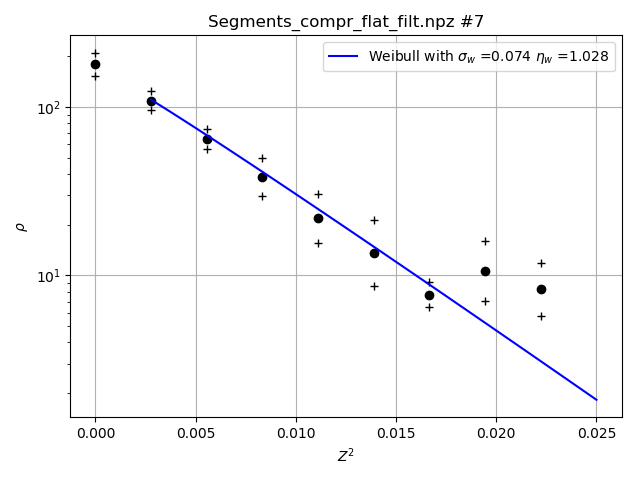

[153.72028545  95.71205965  56.65077861  29.66530101  15.55827637
   8.60697958   6.4692915    7.02196101   5.71929758]
Original =  784
4 0 196 [71 43 30 25 13  6  4  3  0]
4 1 196 [64 45 35 11 10 10  8  4  4]
4 2 196 [66 33 35 29  8  8  7  4  1]
4 3 196 [66 54 34 23 10  2  2  0  0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.0063246339343347845
statsigma =  0.07952756713451496


<IPython.core.display.Javascript object>


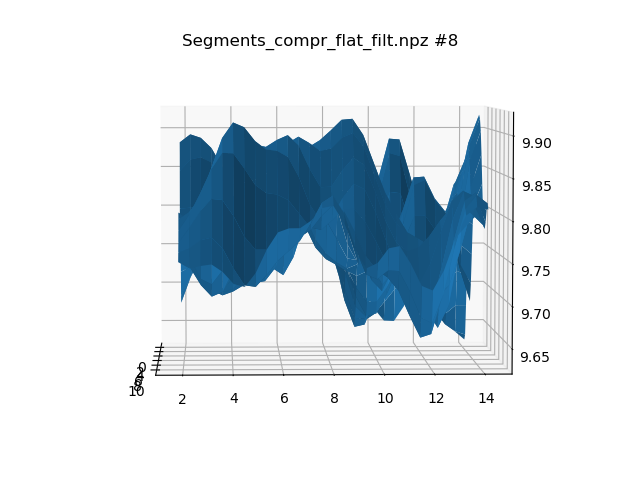

integral =  0.0022858796296296295


<IPython.core.display.Javascript object>


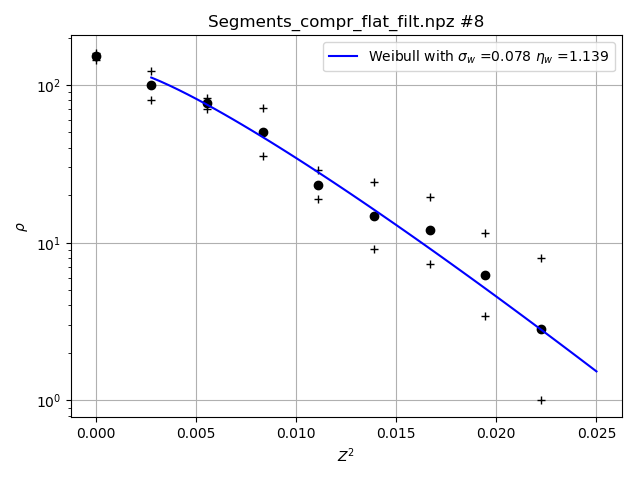

[144.32639579  80.59872435  70.32156545  35.21869908  18.8068837
   9.07618629   7.33592282   3.42851413   1.00973697]
Original =  784
4 0 196 [69 58 19 18 11  7  5  3  2]
4 1 196 [56 47 39 17  9 11  5  4  1]
4 2 196 [62 46 24 13 16 10  4  7  4]
4 3 196 [72 43 27 19 11 13  1  1  3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.006832799327701348
statsigma =  0.08266074841000019


<IPython.core.display.Javascript object>


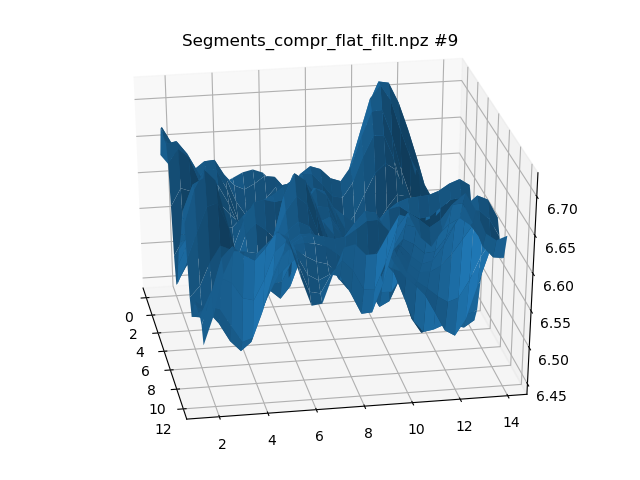

integral =  0.002284236019374725


<IPython.core.display.Javascript object>


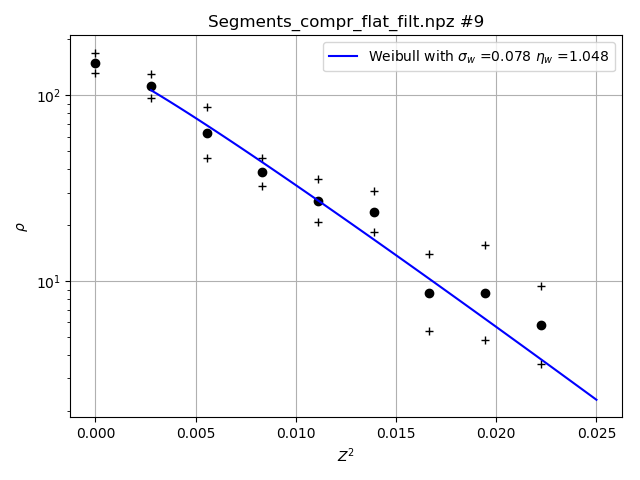

[132.15922737  96.50590764  45.8441556   32.59429871  20.81969287
  18.33461541   5.39847688   4.81528934   3.56800244]
Original =  784
4 0 196 [79 33 30 21 10 15  1  2  1]
4 1 196 [73 44 30 16 13  8  6  3  3]
4 2 196 [78 51 29  9 11  7  1  4  2]
4 3 196 [74 57 21 15  7  9  5  5  2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.005831367709225804
statsigma =  0.07636339246802622


<IPython.core.display.Javascript object>


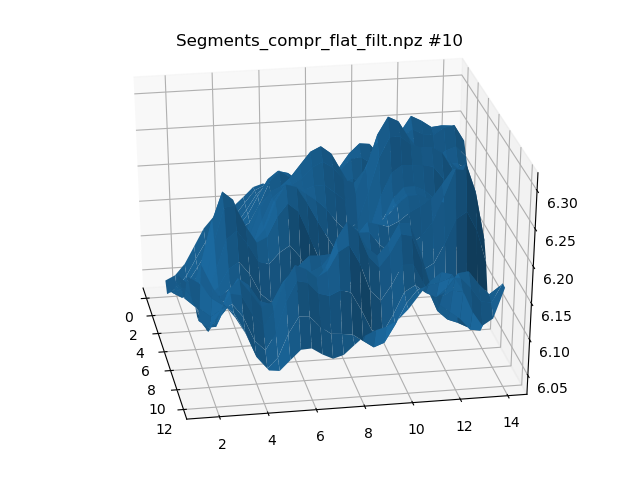

integral =  0.002218637992831541


<IPython.core.display.Javascript object>


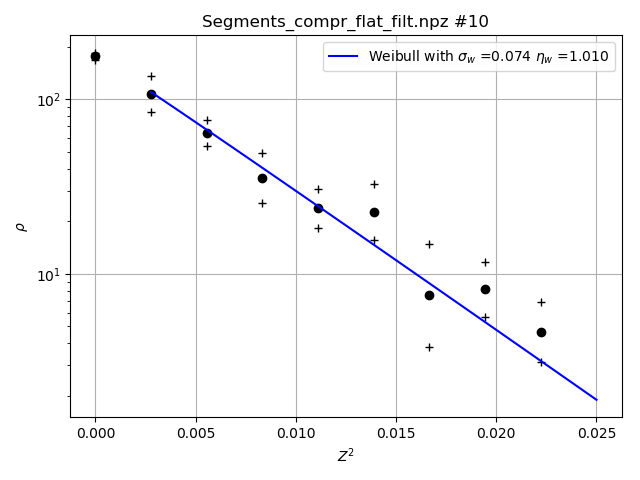

[168.93410464  84.856251    53.73446327  25.55547697  18.43828448
  15.71672456   3.83227571   5.64076118   3.12089611]
Original =  784
4 0 196 [77 46 34 13 18  2  4  0  1]
4 1 196 [71 55 28 14 12  5  2  5  3]
4 2 196 [81 48 27 18  8  5  3  3  1]
4 3 196 [88 45 28 14 11  4  3  3  0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.005213483231873272
statsigma =  0.07220445437695151


<IPython.core.display.Javascript object>


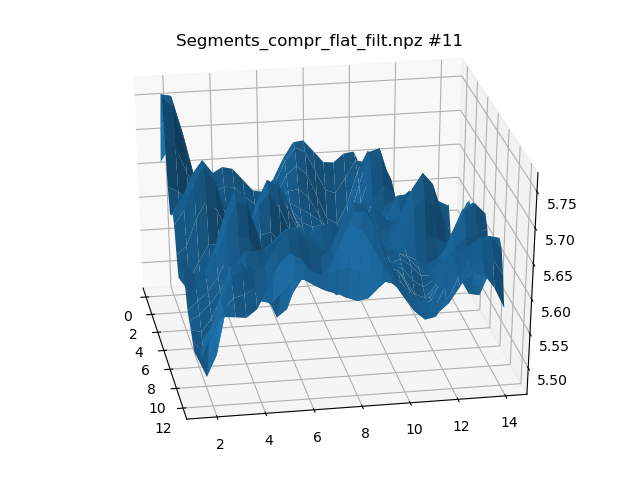

integral =  0.002204415954415954


<IPython.core.display.Javascript object>


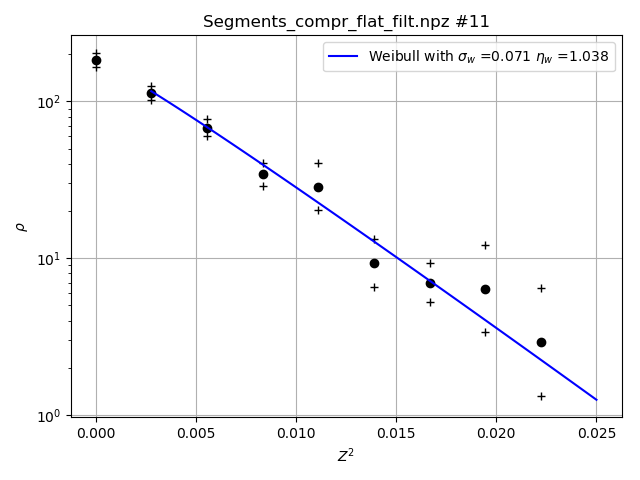

[166.35432762 101.48361138  60.13236363  29.06115231  20.18910279
   6.52980671   5.2584091    3.36482406   1.31566552]


In [45]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Graph the surface
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_title(title)
        ax.view_init(30, -10)
        
        # Normalize the distribution function
        integral_rho = np.trapz(counts, bins)
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho

        # Graph the probability
        plt.figure()
        plt.semilogy(bins, counts, 'ok')
        countsplus = counts+error; #print(countsplus)
        countsminus = counts**2/countsplus; print(countsminus)
        plt.semilogy(bins, countsplus, '+k')
        plt.semilogy(bins, countsminus,'+k')
        plt.title(title)
        plt.xlabel(r'$Z^{2}$')
        plt.ylabel(r'$\rho$')
        plt.grid(True)
        
        # Attempt a best-fit
        ikeep = np.argwhere(Z2flat < Z2maxforhist)
        Z2flat_new = np.squeeze(Z2flat[ikeep])
        analysis = weibull.Analysis(Z2flat_new)
        analysis.fit(method='mle')
        etaW = analysis.beta
        sigma2W = analysis.eta
        sigmaW = np.sqrt(sigma2W)
        
        # Graph the best-fit probability
        myWeibull = Weibull(Z2theory,sigma2W,etaW)
        plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
        plt.legend()
        
    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

Original =  784
4 0 196 [77 46 34 13 18  2  4  0  1]
4 1 196 [71 55 28 14 12  5  2  5  3]
4 2 196 [81 48 27 18  8  5  3  3  1]
4 3 196 [88 45 28 14 11  4  3  3  0]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.005213483231873272
statsigma =  0.07220445437695151
integral =  0.002204415954415954
eta_W =  1.0489713064536312
sigma_W =  0.0754797927749107


<IPython.core.display.Javascript object>


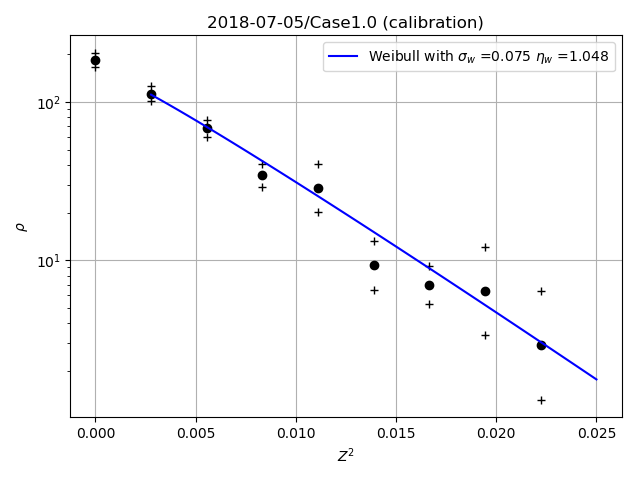

[166.35432762 101.48361138  60.13236363  29.06115231  20.18910279
   6.52980671   5.2584091    3.36482406   1.31566552]


In [46]:
# Sum up the accumulated informaion
Naccum, Laccum = np.shape(Z2flat_list)
Z2flat_total = np.reshape(Z2flat_list,Naccum*Laccum,1)
ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
Z2flat_new = np.squeeze(Z2flat_total[ikeep])

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho

# Get the best Weibull parameters
analysis = weibull.Analysis(Z2flat_new)
analysis.fit(method='mle')
etaW = analysis.beta; print ('eta_W = ',etaW)
sigma2W = analysis.eta
sigmaW = np.sqrt(sigma2W); print ('sigma_W = ',sigmaW)

# Graph the probability
plt.figure()
plt.semilogy(bins, counts, 'ok')
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; print(countsminus)
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(case_and_folder)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)

# Graph the best-fit probability
myWeibull = Weibull(Z2theory,sigma2W,etaW)
plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
plt.legend()

In [47]:
plt.savefig(Roughnessfilename)